In [2]:
import requests
from io import StringIO
from urllib.request import urlretrieve
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier

In [3]:
url = "https://raw.githubusercontent.com/Atik1000/IOT-Dataset/master/Agriculture%20-%20Sheet1.csv?fbclid=IwAR0WxoHsgGEhcIZwDvUC3GPv5512BEj2orM_EaZVjYhkITreefW5ZATl3cY"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
req = requests.get(url, headers=headers)
data = StringIO(req.text)

df=pd.read_csv(url)

In [4]:
df

created_at  entry_id  Temperature   Humidity  SoilMoisture  \
0     2022-08-12 10:00:00 UTC         1    20.879744  82.002744         30.30   
1     2022-08-12 11:04:41 UTC         2    21.770462  80.319644         30.30   
2     2022-08-12 11:04:59 UTC         3    23.004459  82.320763         30.30   
3     2022-08-12 11:05:18 UTC         4    26.491096  80.158363         30.30   
4     2022-08-12 11:05:34 UTC         5    20.130175  81.604873         30.30   
...                       ...       ...          ...        ...           ...   
2195  2022-08-12 11:45:32 UTC      2196    26.774637  66.413269        100.01   
2196  2022-08-12 11:45:32 UTC      2197    27.417112  56.636362        100.01   
2197  2022-08-12 11:45:32 UTC      2198    24.131797  67.225123        100.01   
2198  2022-08-12 11:45:32 UTC      2199    26.272418  52.127394        100.01   
2199  2022-08-12 11:45:32 UTC      2200    23.603016  60.396475        100.02   

      Water  LDR label    N   P   K  
0        44    0  rice   90  42  43  
1        35    0  rice   85  58  41  
2        23    0  rice   60  55  44  
3        10    0  rice   74  35  40  
4         1    0  rice   78  42  42  
...     ...  ...   ...  ...  ..  ..  
2195     52    1  rice  107  34  32  
2196     49    1  rice   99  15  27  
2197     46    1  rice  118  33  30  
2198     47    1  rice  117  32  34  
2199     49    1  rice  104  18  30  

[2200 rows x 11 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   created_at    2200 non-null   object 
 1   entry_id      2200 non-null   int64  
 2   Temperature   2200 non-null   float64
 3   Humidity      2200 non-null   float64
 4   SoilMoisture  2200 non-null   float64
 5   Water         2200 non-null   int64  
 6   LDR           2200 non-null   int64  
 7   label         2200 non-null   object 
 8   N             2200 non-null   int64  
 9   P             2200 non-null   int64  
 10  K             2200 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 189.2+ KB


 *Soil moisture*



In [6]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [7]:
df.SoilMoisture.describe()

count    2200.000000
mean       90.827859
std         9.421485
min        30.300000
25%        86.020000
50%        94.020000
75%        98.030000
max       100.020000
Name: SoilMoisture, dtype: float64

In [8]:
fig = px.histogram(df, 
                   x='SoilMoisture', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of SoilMoisture')
fig.update_layout(bargap=0.1)
fig.show()

*Temperature*

In [9]:
df.Temperature.describe()

count    2200.000000
mean       25.616244
std         5.063749
min         8.825675
25%        22.769375
50%        25.598693
75%        28.561654
max        43.675493
Name: Temperature, dtype: float64

In [10]:
fig = px.histogram(df, 
                   x='Temperature', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Temperature')
fig.update_layout(bargap=0.1)
fig.show()

*Humidity*

In [11]:
df.Humidity.describe()

count    2200.000000
mean       71.481779
std        22.263812
min        14.258040
25%        60.261953
50%        80.473146
75%        89.948771
max        99.981876
Name: Humidity, dtype: float64

In [12]:
fig = px.histogram(df, 
                   x='Humidity', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Humidity')
fig.update_layout(bargap=0.1)
fig.show()

*Water lavel*

In [13]:
df.Water.describe()

count    2200.000000
mean       14.951364
std        30.078779
min       -65.000000
25%        -6.000000
50%        15.000000
75%        36.000000
max       105.000000
Name: Water, dtype: float64

In [14]:
fig = px.histogram(df, 
                   x='Water', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Water')
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
df.corr()


entry_id  Temperature  Humidity  SoilMoisture     Water  \
entry_id      1.000000     0.179543  0.524157      0.857255  0.173925   
Temperature   0.179543     1.000000  0.205320      0.209684  0.023279   
Humidity      0.524157     0.205320  1.000000      0.468635  0.019822   
SoilMoisture  0.857255     0.209684  0.468635      1.000000  0.133570   
Water         0.173925     0.023279  0.019822      0.133570  1.000000   
LDR           0.496807     0.161366 -0.031389      0.578945  0.073635   
N             0.282965     0.026504  0.190688      0.142055  0.124800   
P            -0.167593    -0.127541 -0.118734     -0.104246 -0.032823   
K             0.143461    -0.160387  0.190859      0.162723 -0.084255   

                   LDR         N         P         K  
entry_id      0.496807  0.282965 -0.167593  0.143461  
Temperature   0.161366  0.026504 -0.127541 -0.160387  
Humidity     -0.031389  0.190688 -0.118734  0.190859  
SoilMoisture  0.578945  0.142055 -0.104246  0.162723  
Water         0.073635  0.124800 -0.032823 -0.084255  
LDR           1.000000 -0.241392  0.051618  0.113750  
N            -0.241392  1.000000 -0.231460 -0.140512  
P             0.051618 -0.231460  1.000000  0.736232  
K             0.113750 -0.140512  0.736232  1.000000

In [16]:
px.histogram(df, x='SoilMoisture', color='SoilMoisture', title='SoilMoisture')

In [17]:
px.histogram(df, x='Water', color='Water', title='Water')

In [18]:
px.histogram(df, x='Temperature', color='Temperature', title='Temperature')

In [19]:
px.histogram(df, x='Humidity', color='Humidity', title='Humidity')

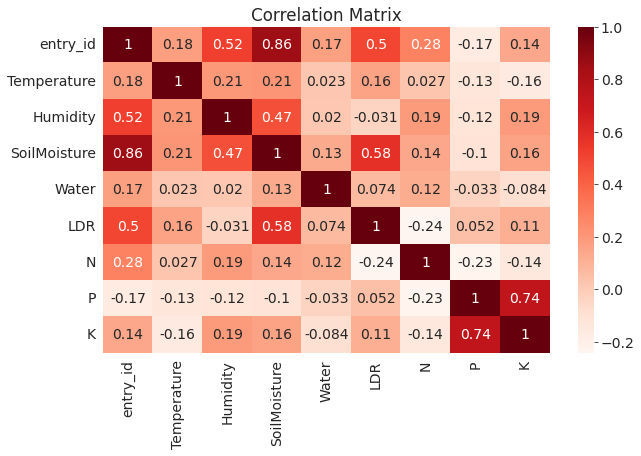

In [20]:
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

In [21]:
print("Shape of the dataframe: ",df.shape)
df.isna().sum()

Shape of the dataframe:  (2200, 11)


created_at      0
entry_id        0
Temperature     0
Humidity        0
SoilMoisture    0
Water           0
LDR             0
label           0
N               0
P               0
K               0
dtype: int64

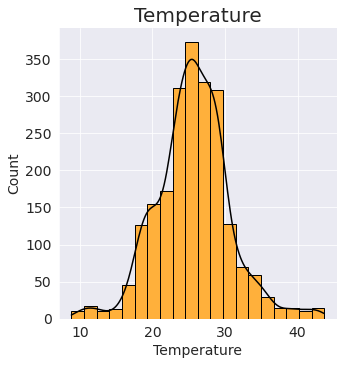

In [22]:
sns.displot(x=df['Temperature'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
plt.title("Temperature",size=20)
plt.show()

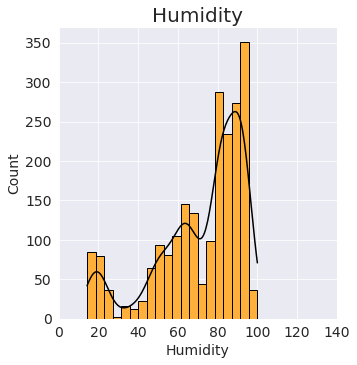

In [23]:
sns.displot(x=df['Humidity'],bins=20,color='black',edgecolor='black',kde=True,facecolor='#ffb03b')
plt.title("Humidity", size=20)
plt.xticks(range(0,150,20))
plt.show()

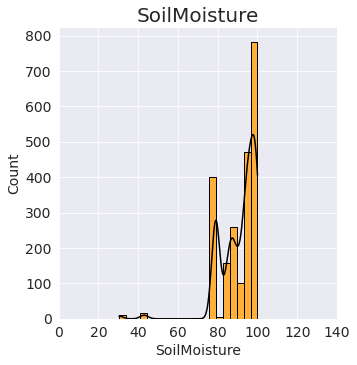

In [ ]:
sns.displot(x=df['SoilMoisture'],bins=20,color='black',edgecolor='black',kde=True,facecolor='#ffb03b')
plt.title("SoilMoisture", size=20)
plt.xticks(range(0,150,20))
plt.show()

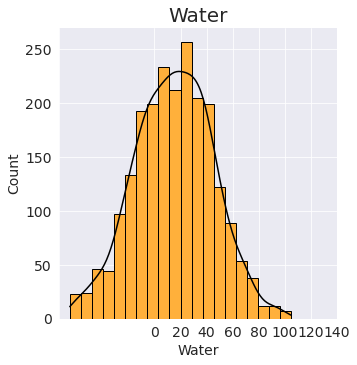

In [ ]:
sns.displot(x=df['Water'],bins=20,color='black',edgecolor='black',kde=True,facecolor='#ffb03b')
plt.title("Water", size=20)
plt.xticks(range(0,150,20))
plt.show()

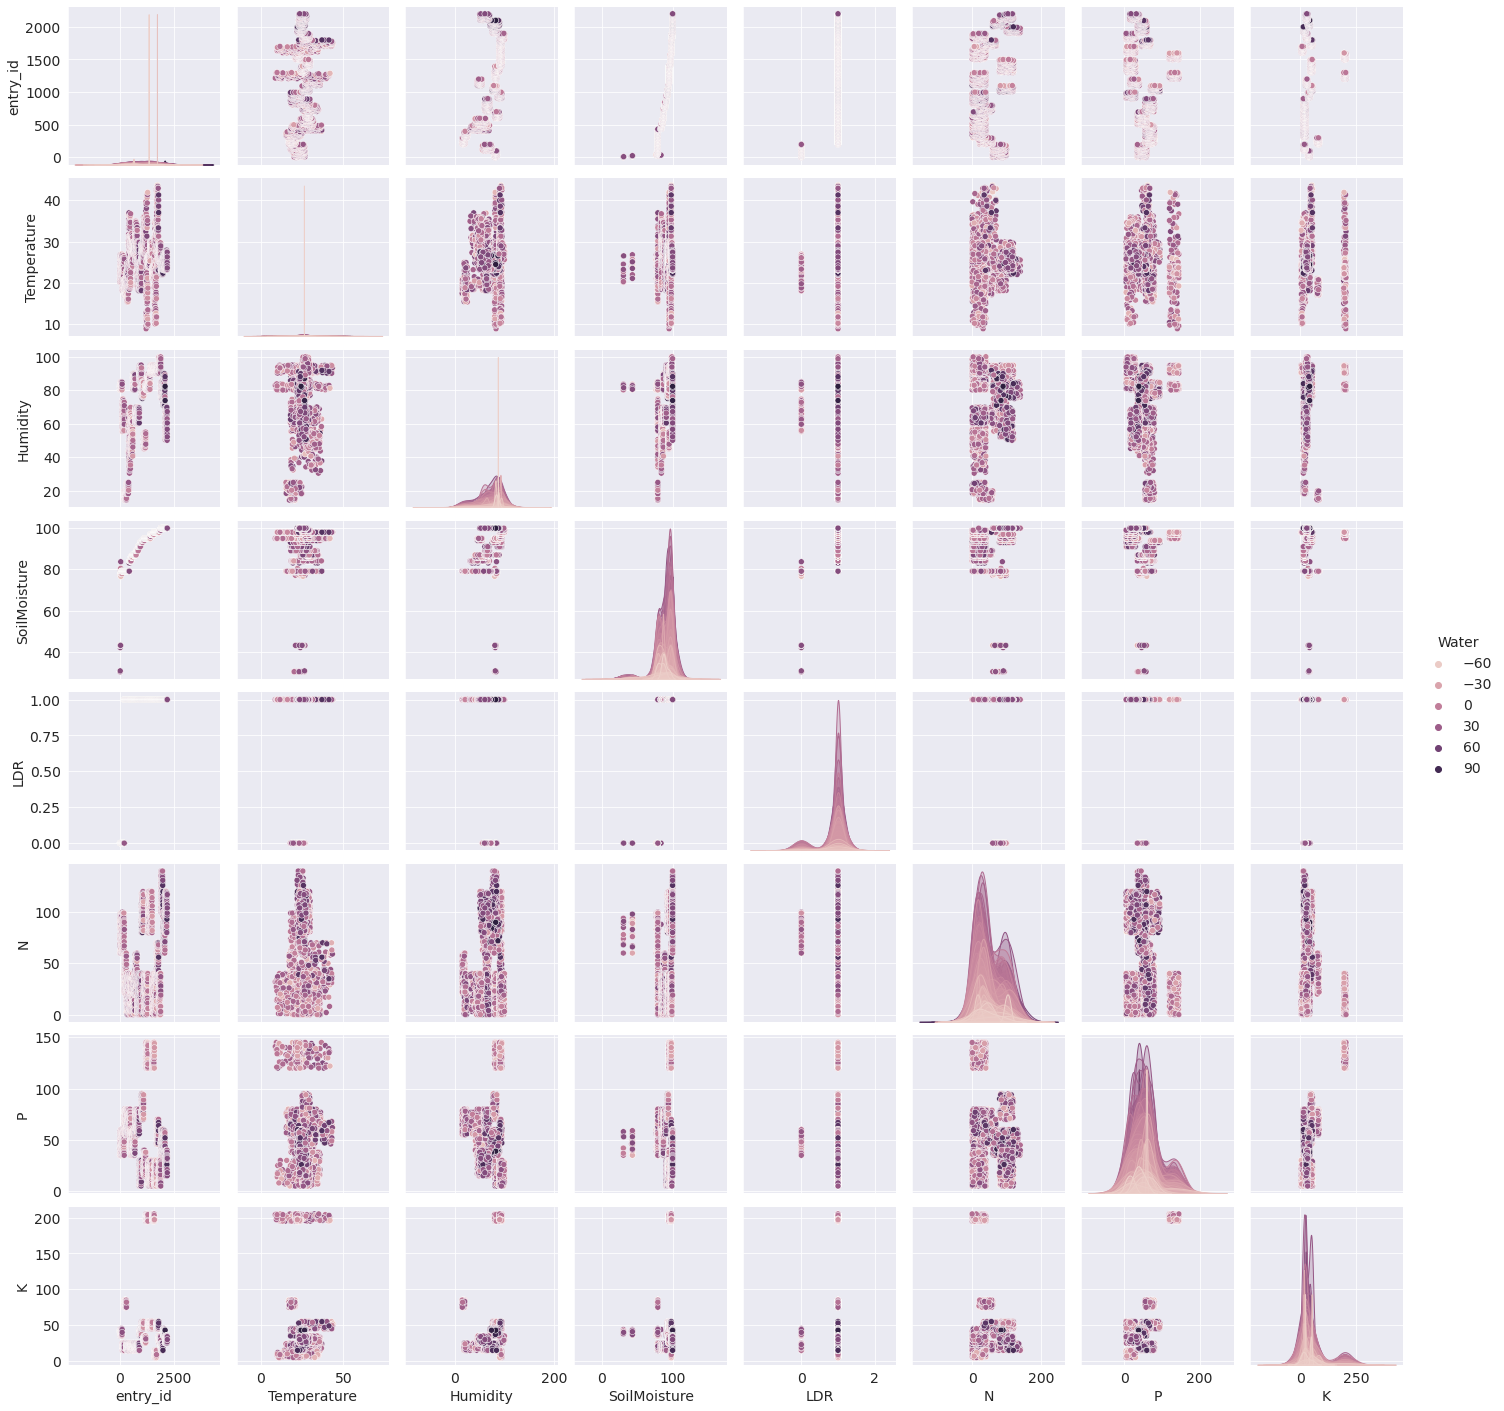

In [ ]:
sns.pairplot(data=df,hue='Water')
plt.show()

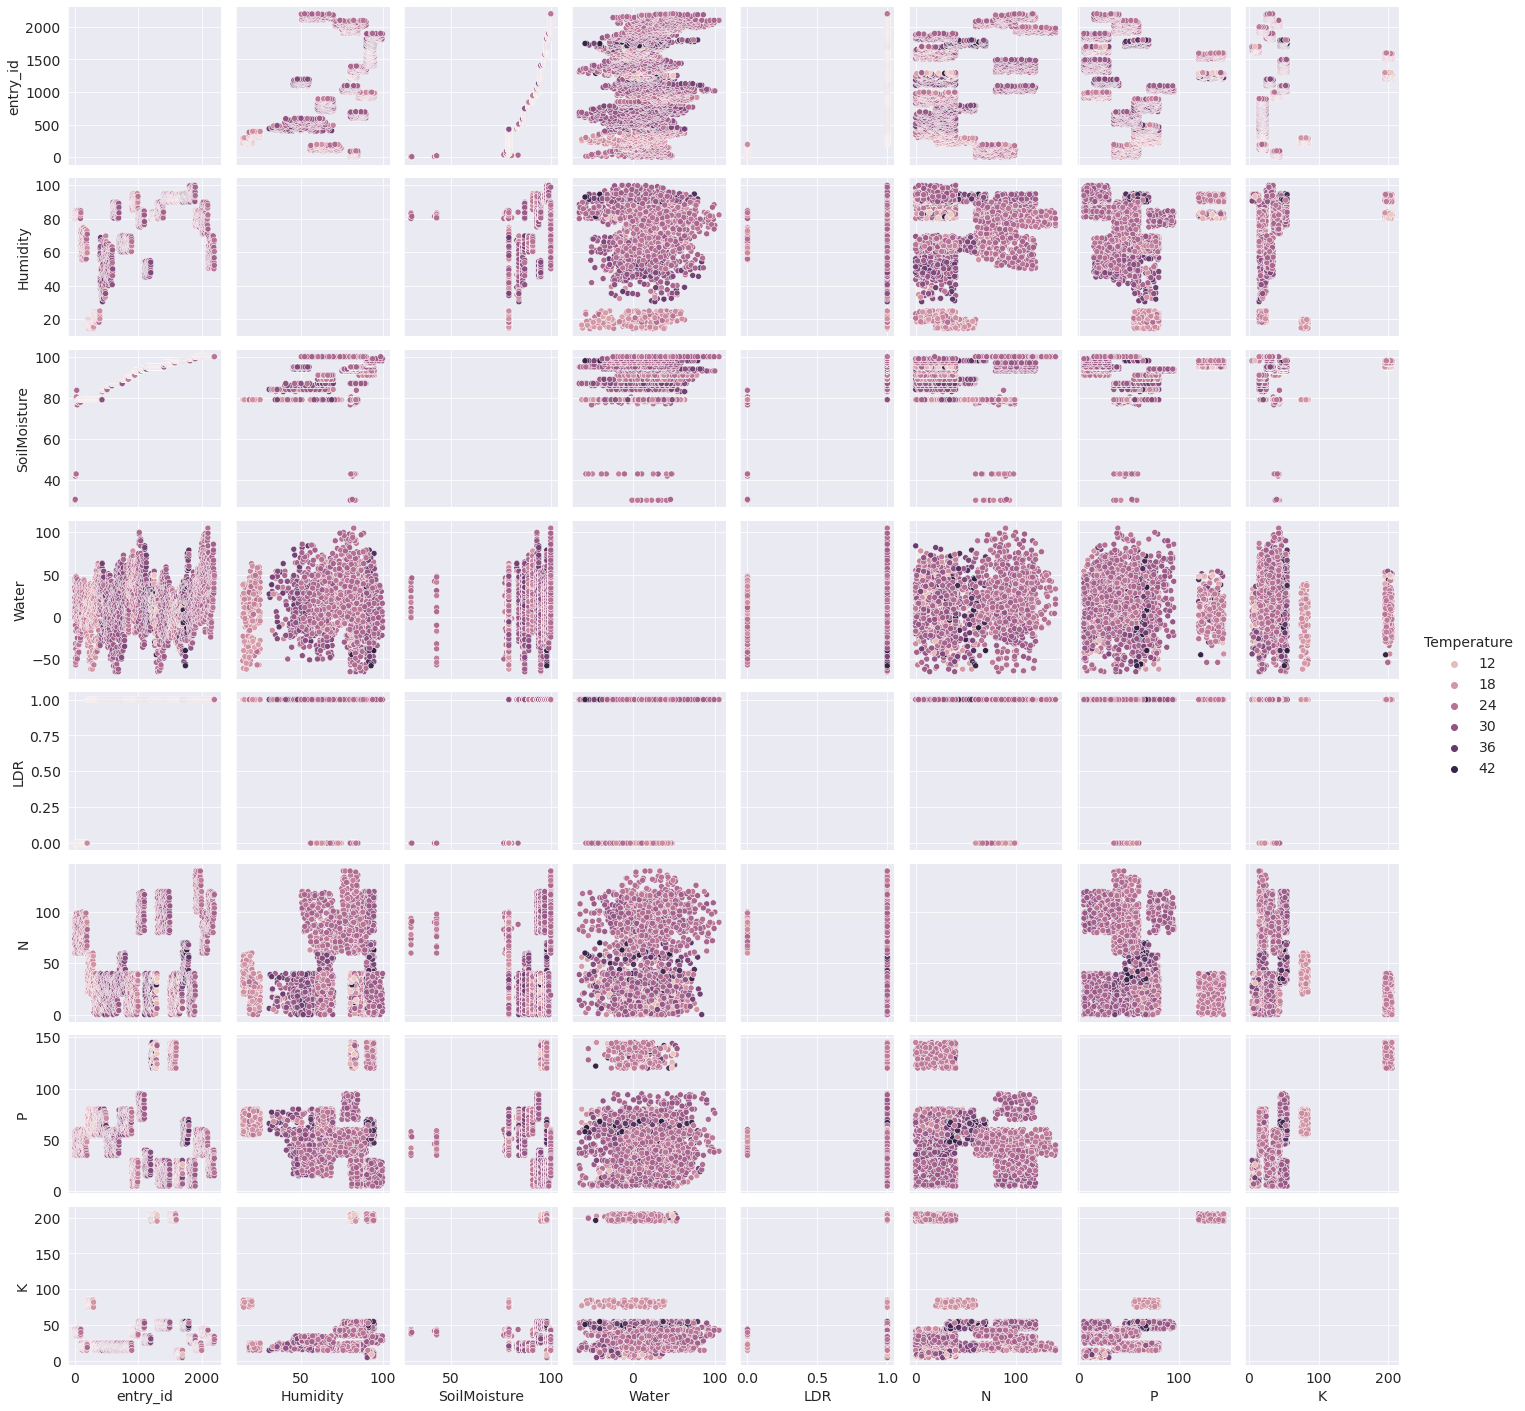

In [ ]:
sns.pairplot(data=df,hue='Temperature')
plt.show()

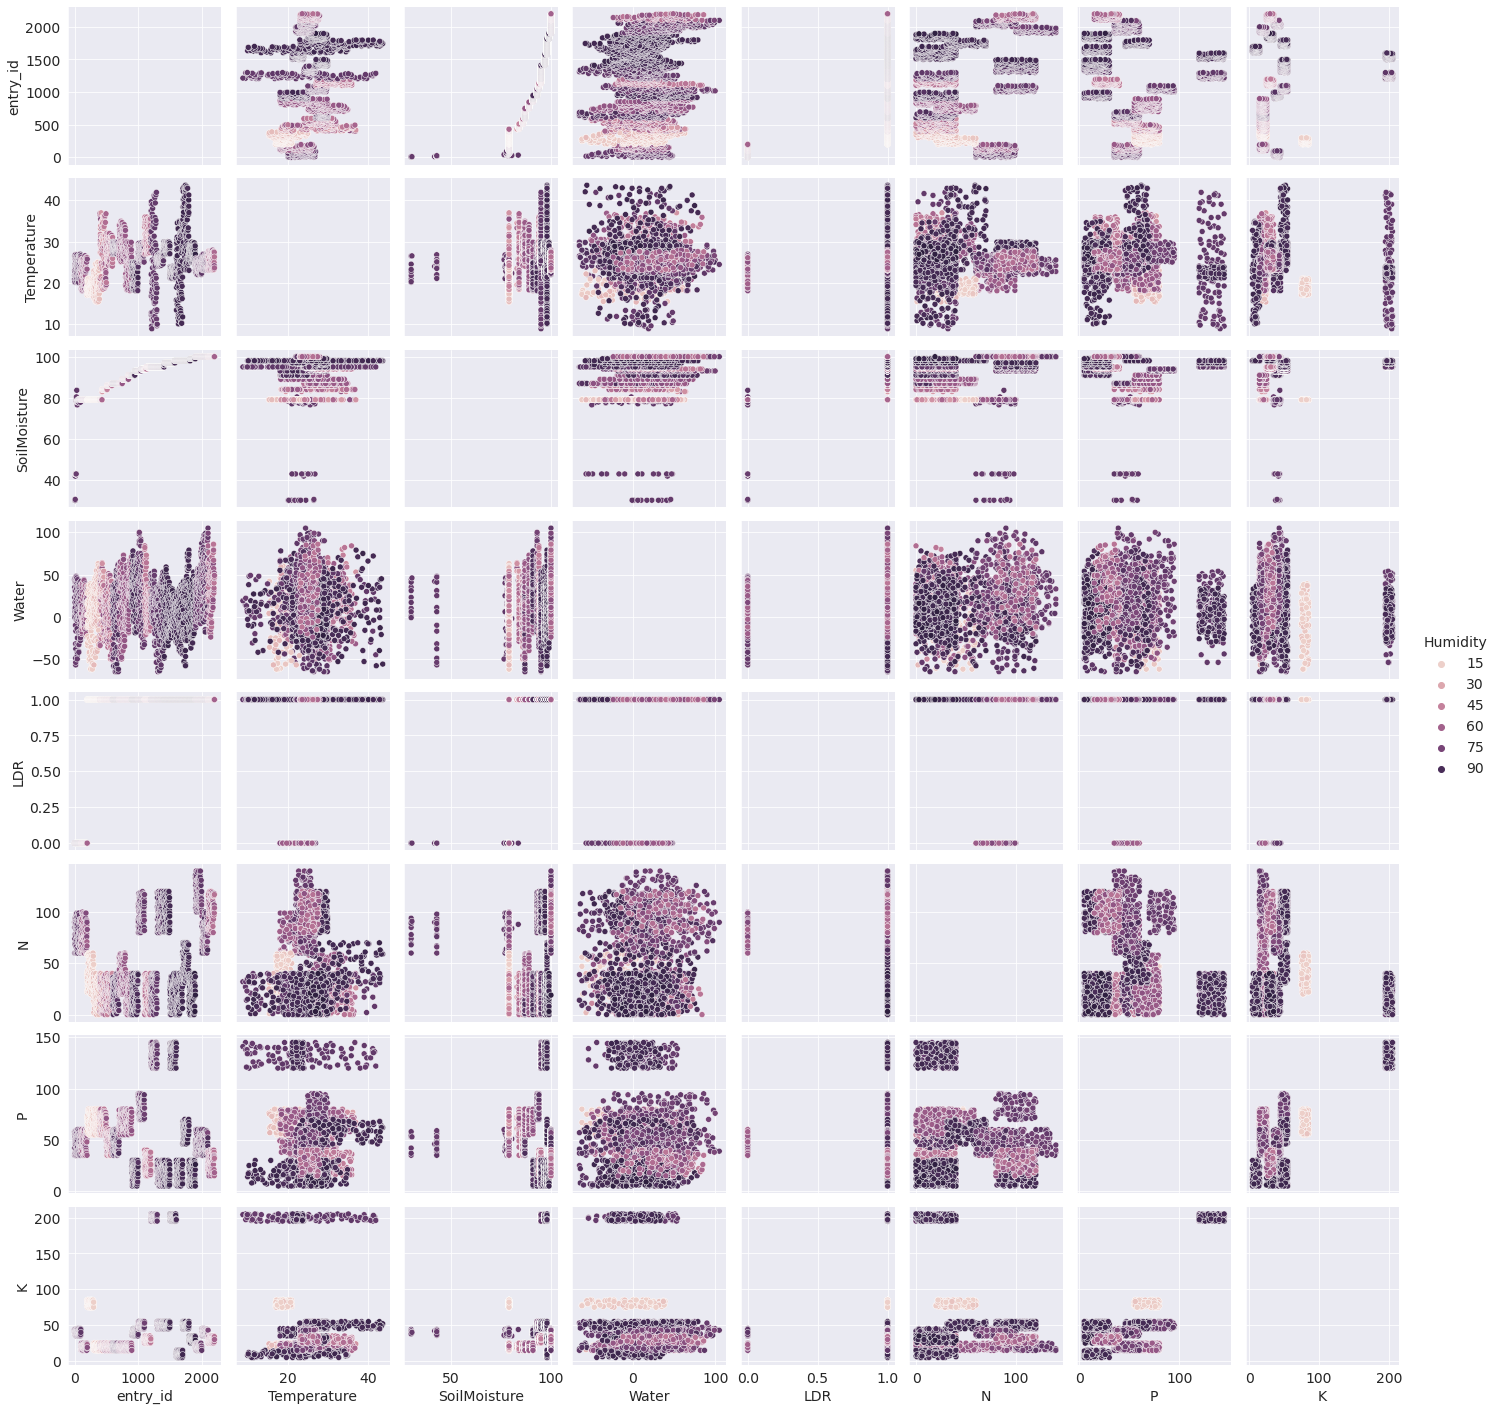

In [ ]:

sns.pairplot(data=df,hue='Humidity')
plt.show()

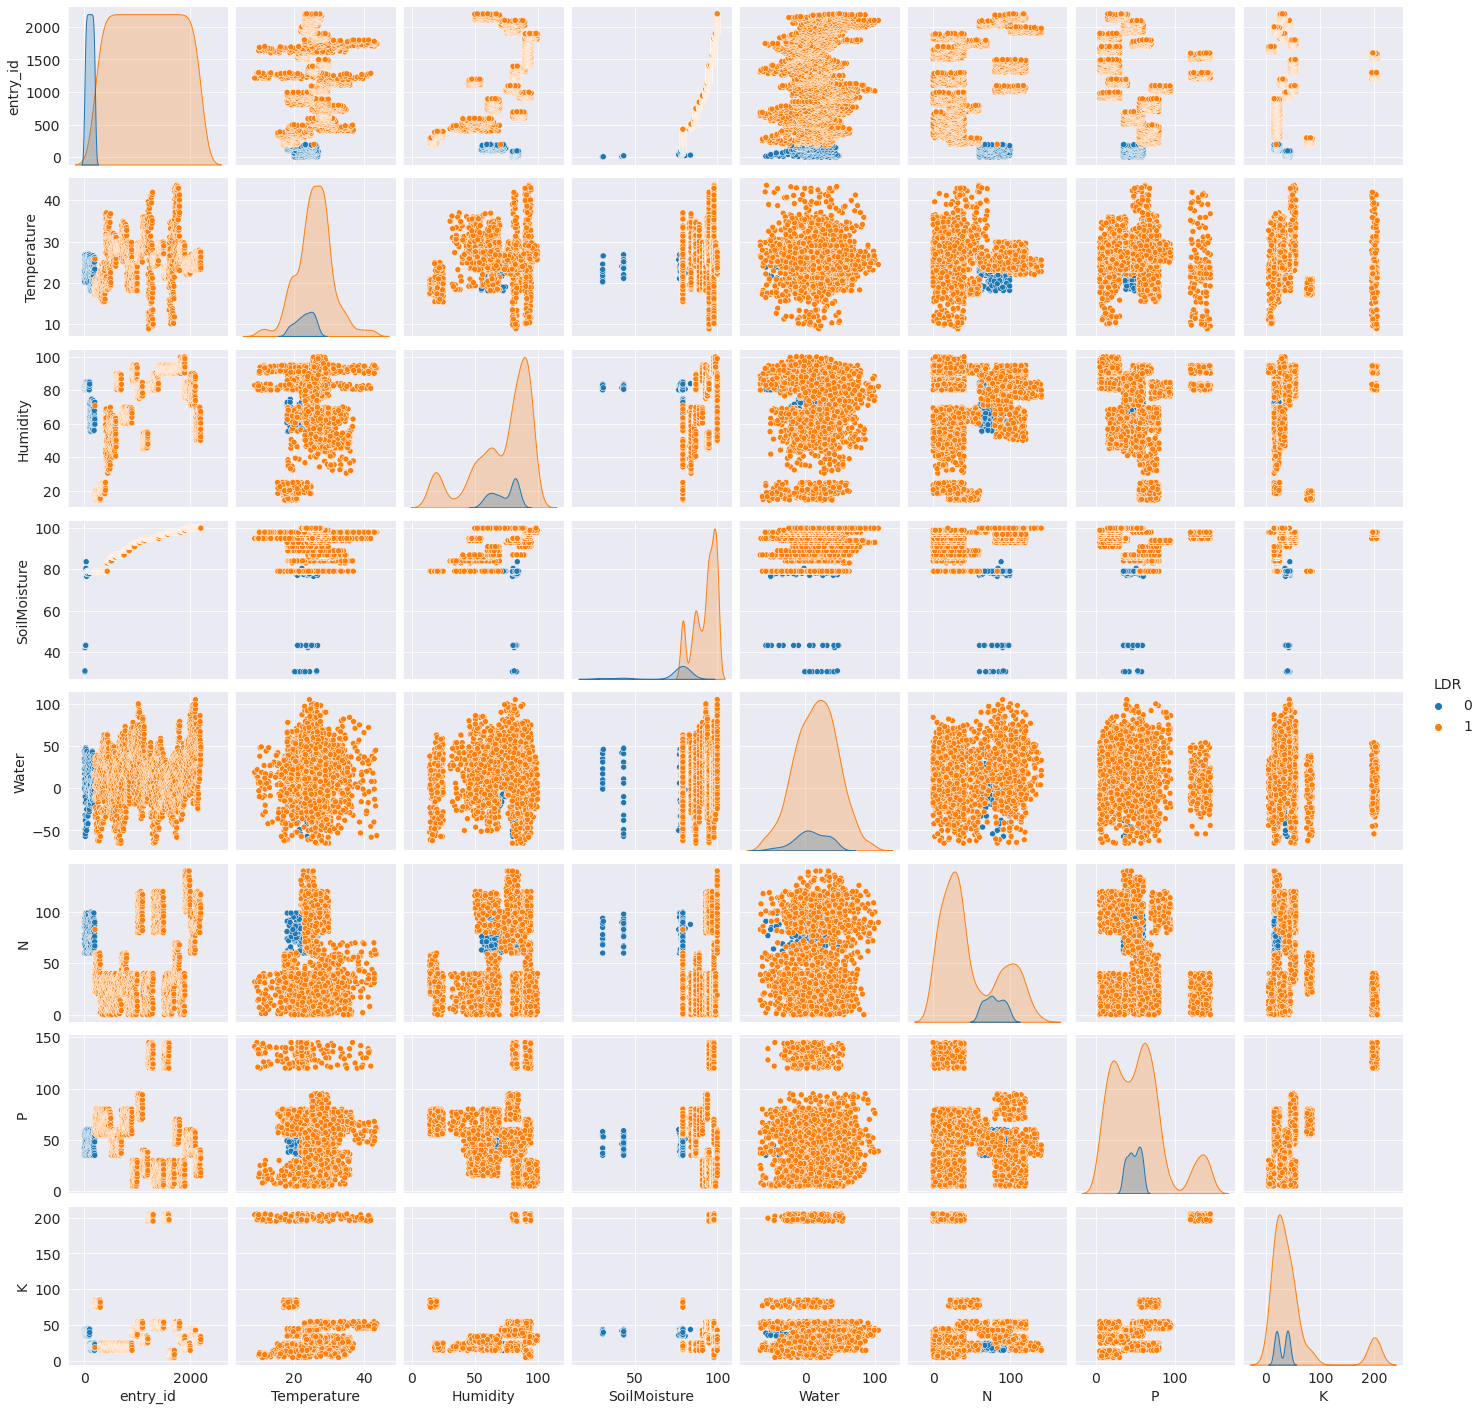

In [ ]:
sns.pairplot(data=df,hue='LDR')
plt.show()

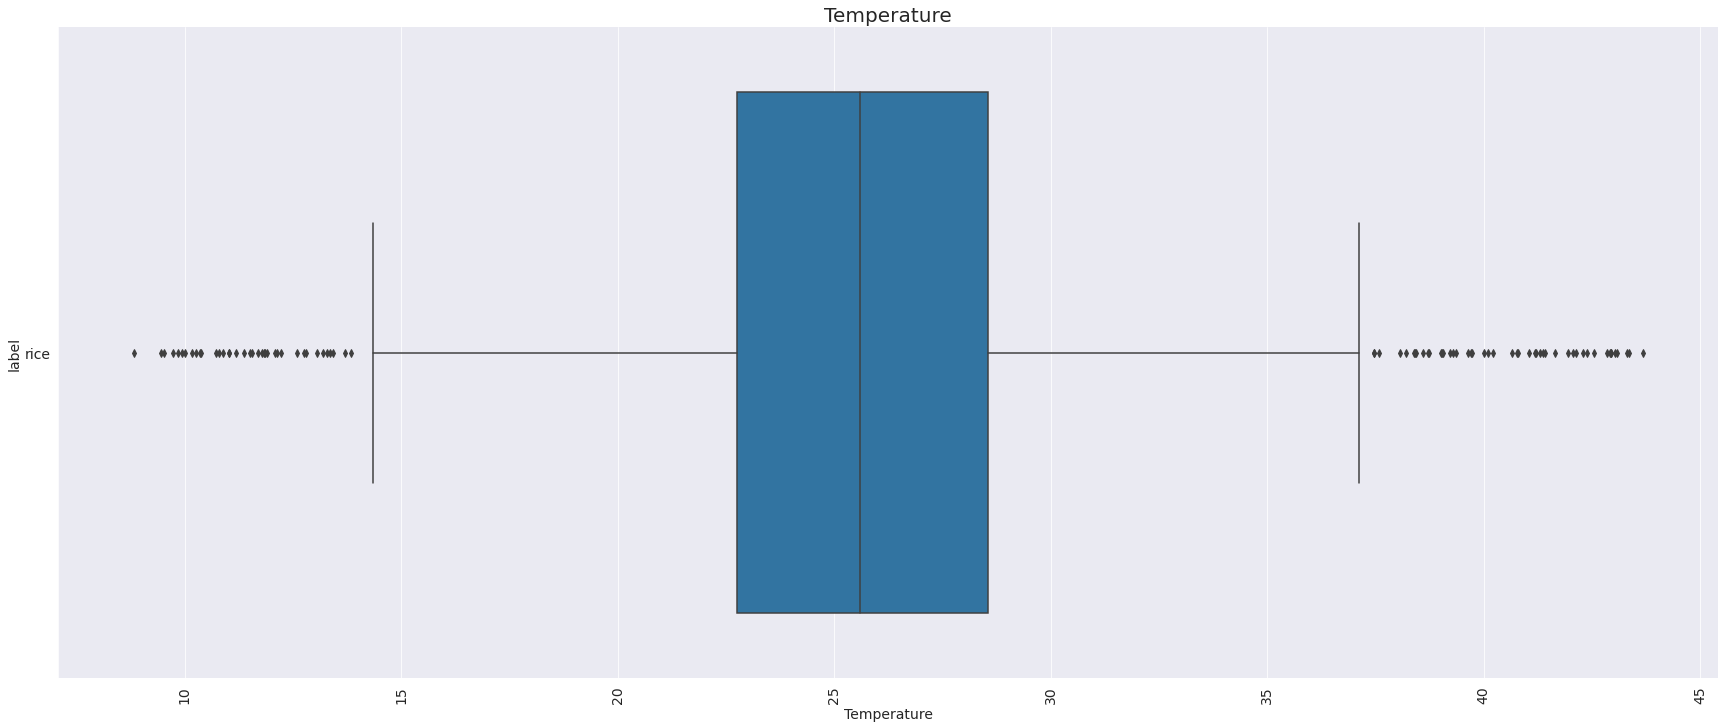

In [ ]:
sns.catplot(data=df, y='label', x='Temperature', kind='box', height=10, aspect=20/8.27)
plt.xticks(rotation='vertical')
plt.title("Temperature", size=20)
plt.show()

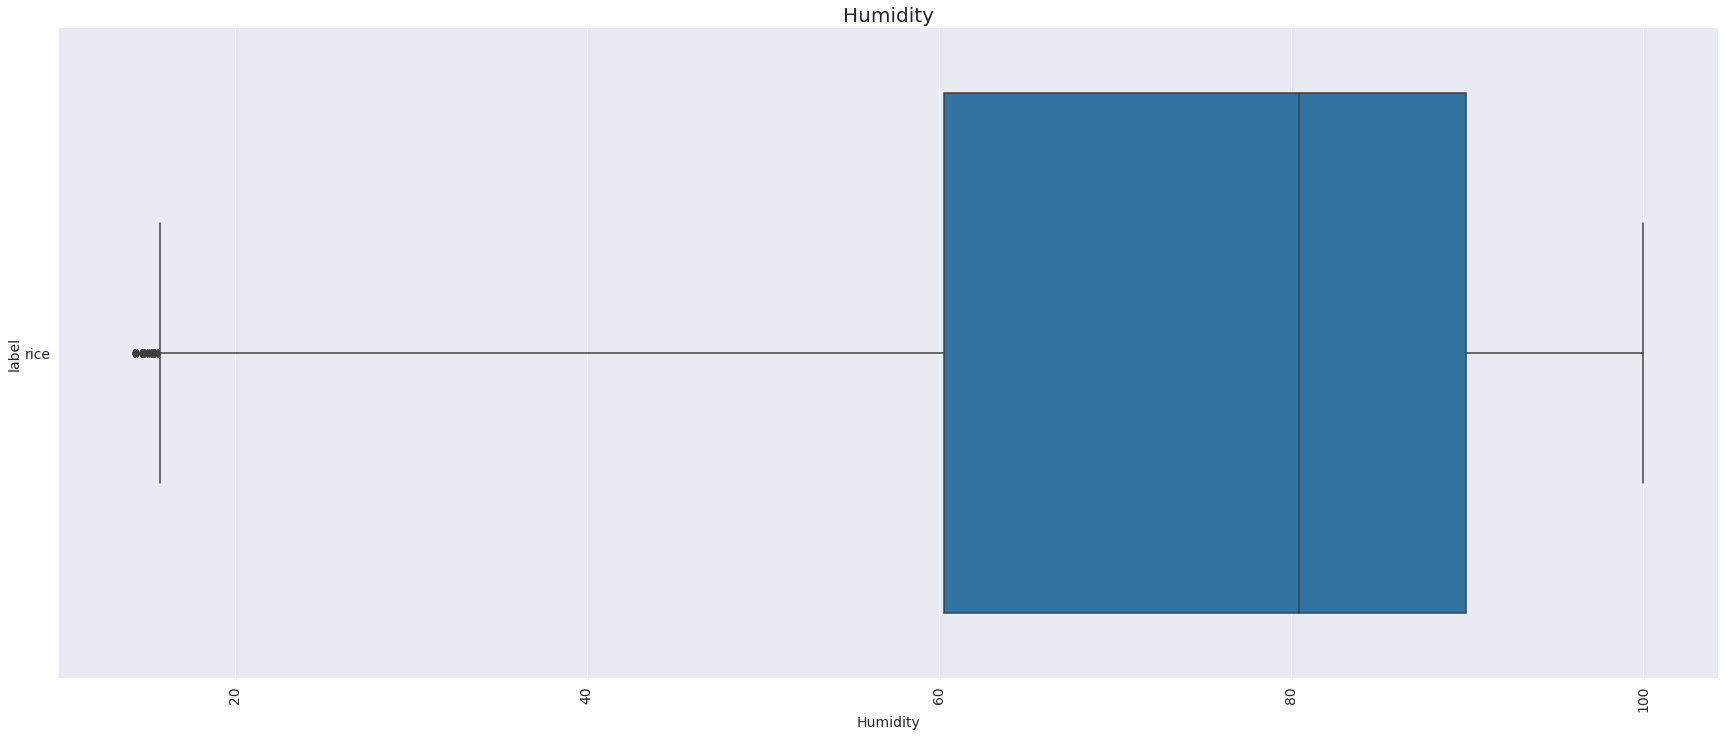

In [ ]:
sns.catplot(data=df, y='label', x='Humidity', kind='box', height=10, aspect=20/8.27)
plt.xticks(rotation='vertical')
plt.title("Humidity", size=20)
plt.show()

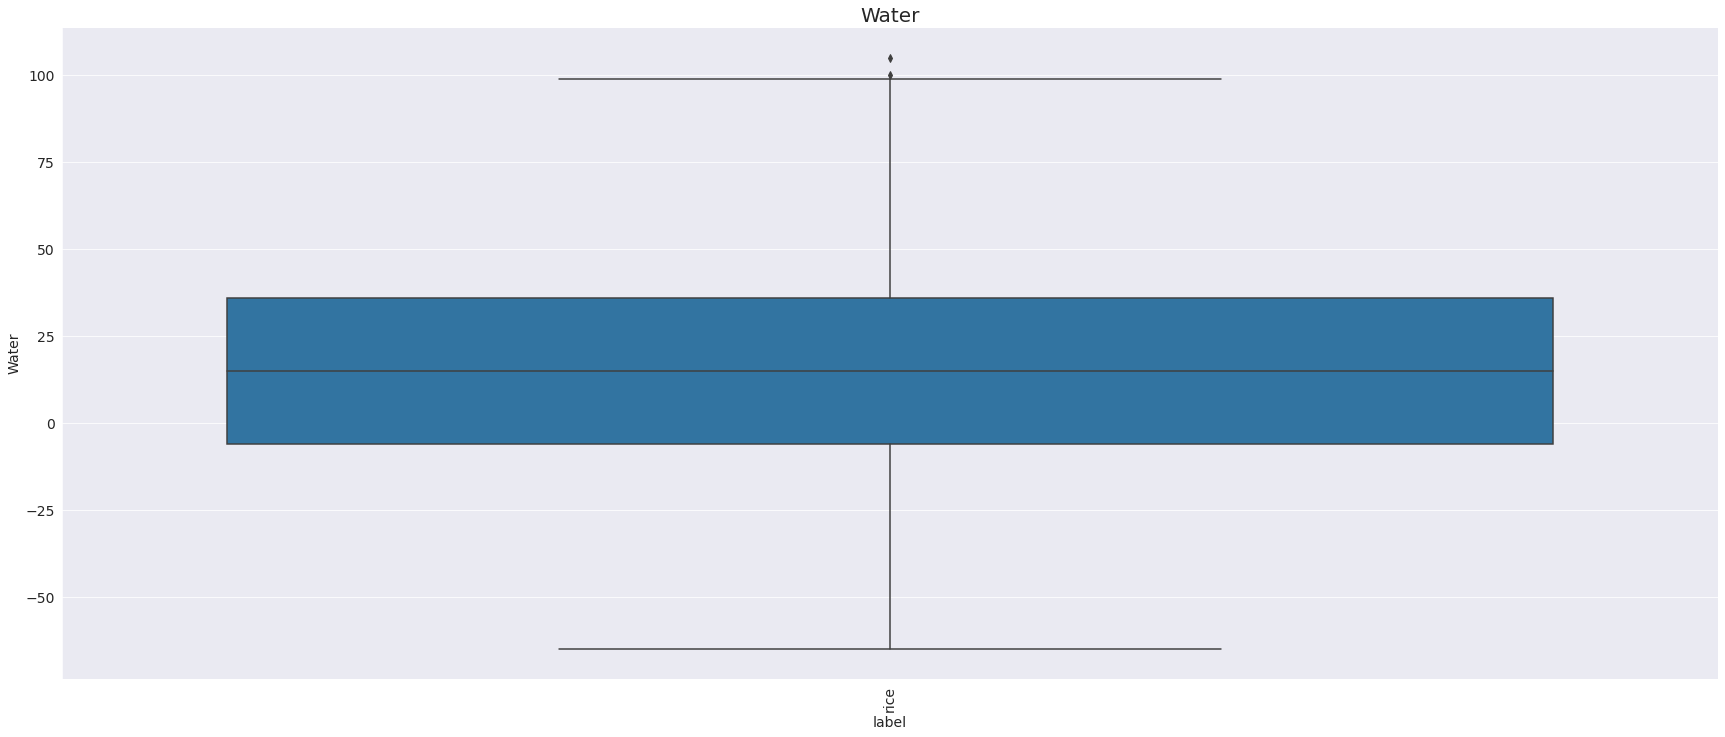

In [ ]:
sns.catplot(data=df, x='label', y='Water', kind='box', height=10, aspect=20/8.27)
plt.xticks(rotation='vertical')
plt.title("Water", size=20)
plt.show()

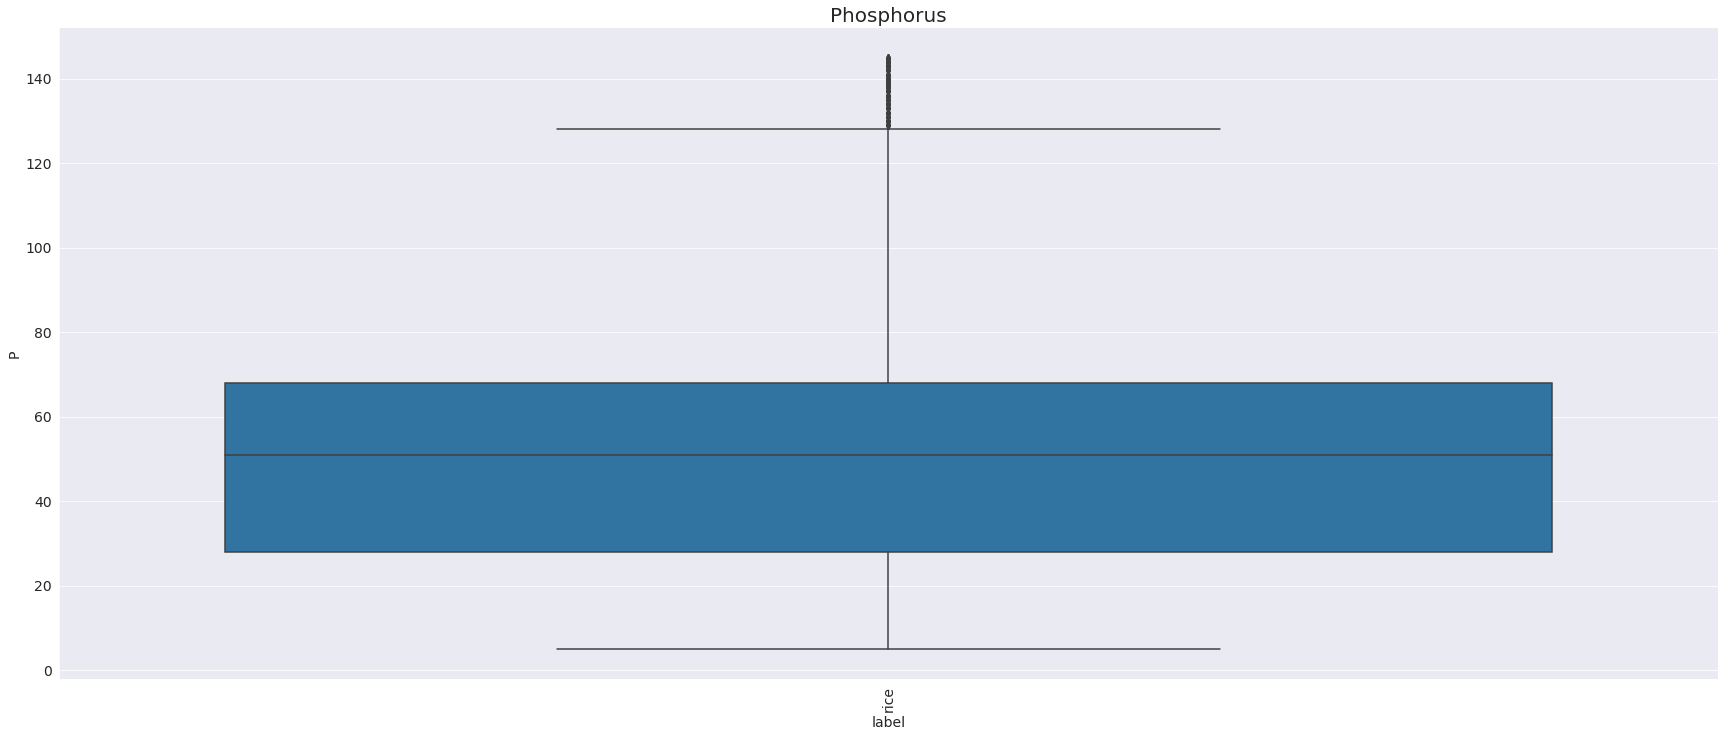

In [26]:
sns.catplot(data=df, x='label', y='P', kind='box', height=10, aspect=20/8.27)
plt.xticks(rotation='vertical')
plt.title("Phosphorus",size=20)
plt.show()



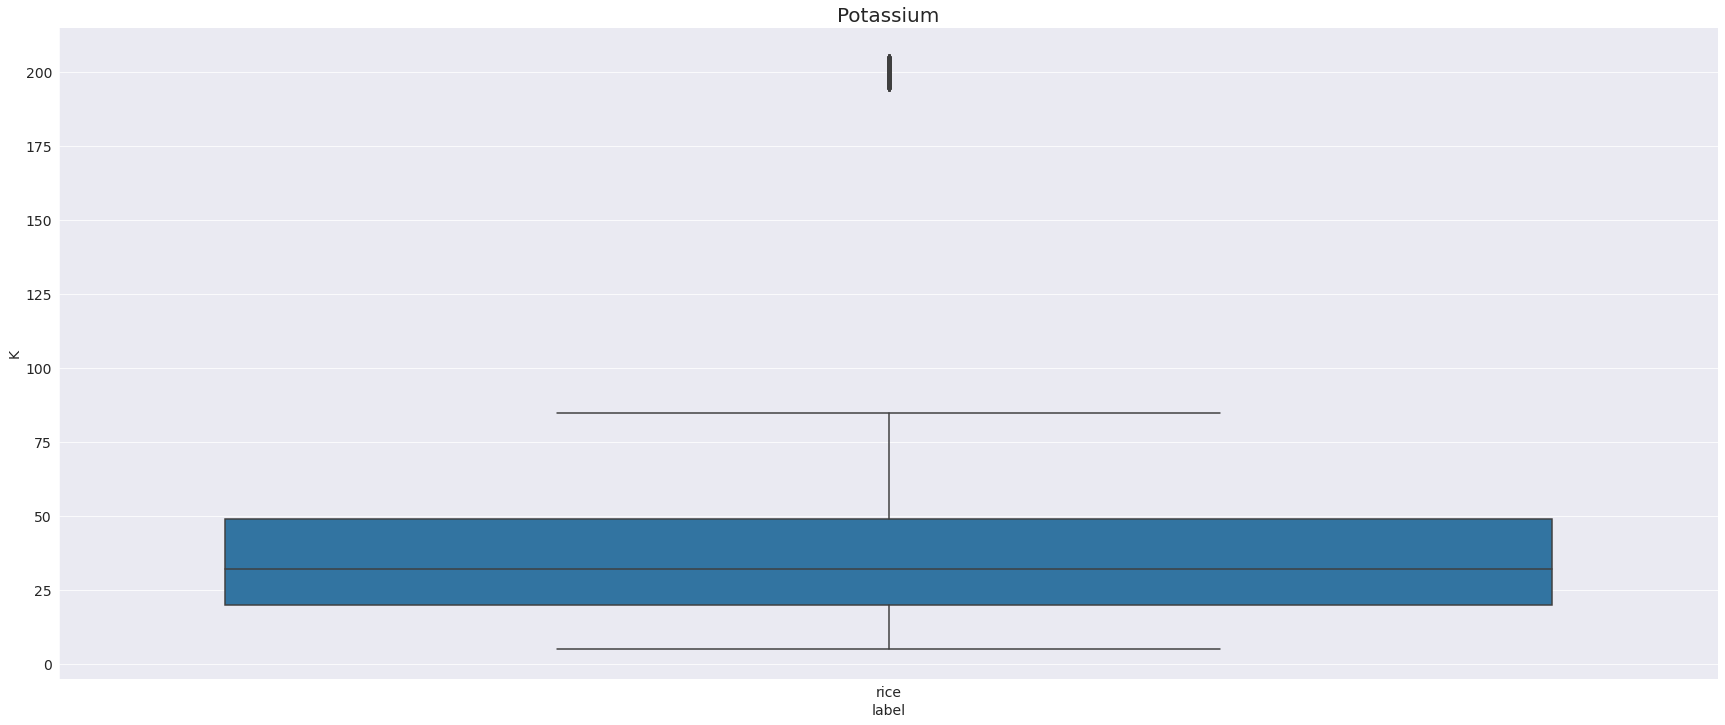

In [27]:
sns.catplot(data=df, x='label', y='K', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Potassium",size=20)
plt.show()

In [28]:
x = df.drop(['label'], axis=1)
x.head()

created_at  entry_id  Temperature   Humidity  SoilMoisture  \
0  2022-08-12 10:00:00 UTC         1    20.879744  82.002744          30.3   
1  2022-08-12 11:04:41 UTC         2    21.770462  80.319644          30.3   
2  2022-08-12 11:04:59 UTC         3    23.004459  82.320763          30.3   
3  2022-08-12 11:05:18 UTC         4    26.491096  80.158363          30.3   
4  2022-08-12 11:05:34 UTC         5    20.130175  81.604873          30.3   

   Water  LDR   N   P   K  
0     44    0  90  42  43  
1     35    0  85  58  41  
2     23    0  60  55  44  
3     10    0  74  35  40  
4      1    0  78  42  42

In [ ]:
Y = df['label']
encode = preprocessing.LabelEncoder()
y = encode.fit_transform(Y)
print("Label length: ",len(y))

Label length:  2200


In [ ]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y)
print(len(x_train),len(y_train),len(x_test),len(y_test))

1650 1650 550 550


In [38]:
def detect_outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (1.5*IQR)
    upper_limit = q3 + (1.5*IQR)
    print(f"Lower limit: {lower_limit} Upper limit: {upper_limit}")
    print(f"Minimum value: {x.min()}   MAximum Value: {x.max()}")
    for i in [x.min(),x.max()]:
        if i == x.min():
            if lower_limit > x.min():
                print("Lower limit failed - Need to remove minimum value")
            elif lower_limit < x.min():
                print("Lower limit passed - No need to remove outlier")
        elif i == x.max():
            if upper_limit > x.max():
                print("Upper limit passed - No need to remove outlier")
            elif upper_limit < x.max():
                print("Upper limit failed - Need to remove maximum value")
detect_outlier(df['K'][df['label']=='grapes'])

Lower limit: nan Upper limit: nan
Minimum value: nan   MAximum Value: nan


In [39]:
for i in df['label'].unique():
    detect_outlier(df['K'][df['label']==i])
    print('---------------------------------------------')

Lower limit: -23.5 Upper limit: 92.5
Minimum value: 5   MAximum Value: 205
Lower limit passed - No need to remove outlier
Upper limit failed - Need to remove maximum value
---------------------------------------------


# **Prediction**

In [31]:
x = df.drop(['label'], axis=1)
x.head()

created_at  entry_id  Temperature   Humidity  SoilMoisture  \
0  2022-08-12 10:00:00 UTC         1    20.879744  82.002744          30.3   
1  2022-08-12 11:04:41 UTC         2    21.770462  80.319644          30.3   
2  2022-08-12 11:04:59 UTC         3    23.004459  82.320763          30.3   
3  2022-08-12 11:05:18 UTC         4    26.491096  80.158363          30.3   
4  2022-08-12 11:05:34 UTC         5    20.130175  81.604873          30.3   

   Water  LDR   N   P   K  
0     44    0  90  42  43  
1     35    0  85  58  41  
2     23    0  60  55  44  
3     10    0  74  35  40  
4      1    0  78  42  42

In [32]:
Y = df['label']
encode = preprocessing.LabelEncoder()
y = encode.fit_transform(Y)
print("Label length: ",len(y))

Label length:  2200


In [33]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y)
print(len(x_train),len(y_train),len(x_test),len(y_test))

1650 1650 550 550
